# Chapter 2 -- Python基础：类

华东师范大学 数学科学学院 陈久宁 2019年10月9日

# 类 = 命名空间 + 实例化 + 特殊规则

## 1. 类是一个命名空间(namespace)

In [42]:
y0 = 2
def add(x, y = y0):
    return x + y

In [43]:
y0

2

In [44]:
add(5)

7

把Foo作为一个命名空间

In [140]:
class Foo:
    y0 = 30
    def add(x, y = y0):
        return x + y

In [141]:
Foo.y0 # 与 y0 不是同一个

30

In [142]:
Foo.add(5) # 与 add 不是同一个

35

In [143]:
Foo.y0 = 50 # 你可以随时修改该命名空间内的数据
Foo.y0

50

Question: 修改`Foo.y0`之后，`Foo.add(5)`的结果是`35` or `55`? 为什么？

# 2. 类可以被实例化(Instantiate)

**Rule 1: 所有对象都是一个`object`**

## 2.1 共享数据结构

In [258]:
class MyNumber:
    value = 1

In [259]:
MyNumber.value

1

实例化/创建一个`MyNumber`对象即以`MyNumber`为模版复制一个命名空间

利用`object.__new__`可以创建一个对象

![](./namespace.png)

`x`, `y`均为`MyNumber`对象

In [262]:
x = object.__new__(MyNumber) # 创建一个MyNumber对象x
x, type(x), x.value

(<__main__.MyNumber at 0x7f752e9c07b8>, __main__.MyNumber, 1)

In [241]:
y = object.__new__(MyNumber) # 创建一个MyNumber对象y
y.value

1

`x.value` 与 `MyNumber.value` 之间的区别：

* `MyNumber.value` 更改会导致后续的所有`MyNumber`都被更改
* `x.value` 更改则不会影响其他`MyNumber`对象

In [242]:
MyNumber.value = 100
MyNumber.value

100

In [243]:
y = object.__new__(MyNumber)
y.value

100

In [244]:
x.value = 1000
x.value

1000

In [245]:
z = object.__new__(MyNumber)
z.value

100

除非必要，不要以`MyNumber.value`的形式共享数据，而仅仅只共享数据的结构

In [268]:
class MyNumber:
    pass # 占位符 -- 啥也不做

用函数将实例化的过程包装起来

In [269]:
def initialize_MyNumber(x0):
    number = object.__new__(MyNumber)
    number.value = x0
    return number

In [270]:
x = initialize_MyNumber(1)
y = initialize_MyNumber(2)
x.value, y.value

(1, 2)

Q1:

```python
class MyNumber:
    value = 1 # 这样写会发生什么？
   
def initialize_MyNumber(x0):
    number = object.__new__(MyNumber)
    number.value = x0
    return number

x = initialize_MyNumber(2)
```

In [267]:
# 改变x不会影响y
x.value = 100
x.value, y.value

(100, 2)

**Rule2: 用`__init__`来初始化对象**

In [386]:
class MyNumber:
    def __init__(self, x0):
        self.value = x0

In [251]:
x = MyNumber(10)
y = MyNumber(20)
x.value, y.value

(10, 20)

```python
MyNumber(10)
```

等价于

```python
number = object.__new__(MyNumber)
MyNumber.__init__(number, 10)
```

`__init__`只是一个占位符来统一对象的初始化规则。我们想要的是`MyNumber(10)` 而不是 `initialize_MyNumber(10)`

Q2:

```python
class MyNumber:
    def __init__(self, x0):
        self.value = x0
        return self # 添加这一行会发生什么？
```

## 2.2 共享函数（一）

In [294]:
class MyNumber:
    def __init__(self, value):
        self.value = value
    
    # MyNumber下的加法
    def add(x, y):
        return MyNumber(x.value + y.value)

In [295]:
x = MyNumber(1)
y = MyNumber(2)
z = MyNumber.add(x, y)
z.value

3

Q3:

```python
class MyNumber:
    def __init__(self, value):
        self.value = value
    
    # 这样定义会发生什么？
    def add_(x, y):
        x.value += y.value
        return x
```

**Rule 3**:

* `MyNumber.add(x, y)` 可以写成 `x.add(y)`的形式
* `x.add(y)`将`x`作为`add`的第一个参数

In [296]:
z = x.add(y) # 等价于 MyNumber.add(x, y)
z.value

3

## 2.3 一些术语（一）

* `MyNumber`是一个**类**(class)
* `__init__`是`MyNumber`类的**构造函数**(constructor)
* `x = MyNumber(10)` 中的`x`称为类的**实例**(instance)

根据数据是否被共享，变量可以被分为：

* 被共享： **类变量** (class variable) -- 又称**静态变量** (static variable)
* 不被共享： **成员变量** (member variable)

根据函数是否需要具体实例的信息，函数可以被分为：

* 不需要： **类方法**（class method) -- 又称**静态函数** (static function)
* 需要：**成员方法** (member method)

> 方法(method)与函数(function)这两个概念在面向对象编程里经常被混用

In [307]:
class MyNumber:
    VALUE = 1 # 静态变量
    
    def __init__(self, x):
        self.value = x # 成员变量
    
    # 成员方法： 需要知道成员的具体数据内容
    def show(self):
        print(self.value)
        
    # 静态方法： 与具体实例中的数据内容无关的方法
    def SHOW():
        print(MyNumber.VALUE)

In [309]:
# 静态方法不需要一个类的实例就可以使用
MyNumber.SHOW()

1


In [311]:
# 成员方法必须要传入一个类的实例
x = MyNumber(100)
x.show()
MyNumber.show(x)

100
100


延伸：

* [**属性**(property)](https://docs.python.org/3/library/functions.html#property)
* [**私有变量/方法**(private)与**公有变量/方法**(public)](https://docs.python.org/3/tutorial/classes.html#private-variables)

# 3. 类的继承与设计

![](animal.png)

In [395]:
class Animal:
    def __init__(self, age):
        self.age = age
        
    def move(self):
        print("An animal is moving")
        
        
class Human(Animal): # Human 是一个（继承于） Animal 类
    def __init__(self, age, name):
        # 先调用Animal提供的初始化方法，然后再提供额外的初始化
        super().__init__(age) # 等价于 Animal.__init__(self, age)
        self.name = name
    
    # 重写(override) Animal 提供的 move 方法
    def move(self):
        print(f"{self.name} is moving")
    
    # 新增一些仅限于 Human 的方法
    def smile(self):
        print(f"{self.name} smiles.")
        
    def play(self, obj):
        print(f"{self.name} is playing {obj}")
        
    def study(self, course_name):
        print(f"{self.name} is studying {course_name}")
        

class Dog(Animal):
    pass # 直接使用 Animal 提供的所有内容: __init__ 及 move

In [385]:
me = Human(25, "JC")
print(f"me.age = {jc.age}")
print(f"me.name = {jc.name}")

me.age = 25
me.name = JC


In [379]:
me.smile()

JC smiles.


In [380]:
me.play("WoW")

JC is playing WoW


In [381]:
me.move()

JC is moving


In [382]:
my_dog = Dog(1)
print(f"my_dog.age = {my_dog.age}")

my_dog.age = 1


In [383]:
my_dog.move()

An animal is moving


### 一些术语（二）

* `Human`和`Dog`**继承**(inherit)于`Animal`类
  * `Animal` 是`Human`和`Dog`的**父类**(parent class)
  * `Human`和`Dog` 是`Animal`的**子类**(children class)
* `Animal`**重写**(override)了`Human`提供的`move()`方法

# 4. 一些常用的特殊方法

* `__add__()`, `__sub__()`, `__mul__()`, `__matmul__()`, `__div__()` 分别定义了 `+, -, *, @, /`操作 
* `__repr__()` 定义了类如何被显示
* `__str__()` 定义了类如何被转换成字符串

More: [Special method names](https://docs.python.org/3/reference/datamodel.html#special-method-names)

**Example 1**： 定义一个关于数的类

In [445]:
class MyNumber:
    def __init__(self, value):
        self.value = value
        
    def __add__(self, x): # +
        return MyNumber(self.value + x.value)
    
    def __mul__(self, x): # *
        return MyNumber(self.value * x.value)

    def __sub__(self, x): # -
        return MyNumber(self.value - x.value)
    
    def __truediv__(self, x): # /
        return MyNumber(self.value / x.value)
    
    def __floordiv__(self, x): # //
        return MyNumber(self.value // x.value)
    
    def __lt__(self, x): # <
        return self.value < x.value
    
    def __le__(self, x): # <=
        return self.value <= x.value
    
    def __repr__(self):
        return f"MyNumber({self.value})"
    
    def __str__(self):
        return str(self.value)

In [446]:
x = MyNumber(1)
y = MyNumber(2)
x, y

(MyNumber(1), MyNumber(2))

In [447]:
f"{x} + {y} = {x+y}"

'1 + 2 = 3'

In [448]:
X = map(MyNumber, range(3, 7))
Y = map(MyNumber, range(4, 0, -1))

for (x, y) in zip(X, Y):
    print(f"{x} + {y} = {x+y}")
    print(f"{x} * {y} = {x*y}")
    print(f"{x} / {y} = {x/y}")
    print(f"{x} // {y} = {x//y}")

3 + 4 = 7
3 * 4 = 12
3 / 4 = 0.75
3 // 4 = 0
4 + 3 = 7
4 * 3 = 12
4 / 3 = 1.3333333333333333
4 // 3 = 1
5 + 2 = 7
5 * 2 = 10
5 / 2 = 2.5
5 // 2 = 2
6 + 1 = 7
6 * 1 = 6
6 / 1 = 6.0
6 // 1 = 6


**Example 2**：定义一个函数类

In [459]:
import math
import matplotlib.pyplot as plt

In [504]:
class Threshold:
    def __init__(self, vmin=-math.inf, vmax=None):
        if vmax is None:
            vmax = abs(vmin)
            vmin = -vmax
        
        self.vmin = vmin
        self.vmax = vmax
        
    def __call__(self, x): # 每一个Threshold实例都可以被作为函数使用
        return min(self.vmax,
            max(self.vmin, x))

In [507]:
X = list(range(-10, 10))
X

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [508]:
T1 = Threshold()
Y1 = [T1(x) for x in X]
Y1

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [509]:
T2 = Threshold(8)
Y2 = [T2(x) for x in X]
Y2

[-8, -8, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8]

In [510]:
T3 = Threshold(-1, 3)
Y3 = [T3(x) for x in X]
Y3

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 1, 2, 3, 3, 3, 3, 3, 3, 3]

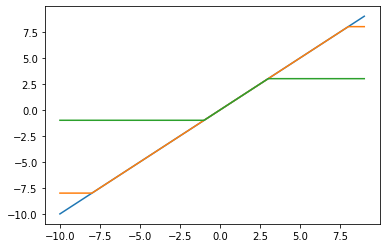

In [511]:
plt.plot(X, Y1)
plt.plot(X, Y2)
plt.plot(X, Y3)